In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [67]:
data = pd.read_csv("Sale-Package_y_w_32131-0003.csv")

In [68]:
print(data)

     Year              States  Sorting facilities (in-house and external)  \
0    2001   Baden-Württemberg                                       265.4   
1    2001              bayern                                       154.2   
2    2001              Berlin                                       102.1   
3    2001         Brandenburg                                        90.8   
4    2001              Bremen                                         7.5   
..    ...                 ...                                         ...   
315  2020            Saarland                                        43.9   
316  2020             Sachsen                                        79.5   
317  2020      Sachsen-Anhalt                                        45.5   
318  2020  Schleswig-Holstein                                        21.6   
319  2020           Thuringia                                        48.1   

     Recovery operators (including scrap merchants)  Total  
0             

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            320 non-null    int64  
 1   States                                          320 non-null    object 
 2   Sorting facilities (in-house and external)      320 non-null    float64
 3   Recovery operators (including scrap merchants)  320 non-null    float64
 4   Total                                           320 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 12.6+ KB


In [70]:
state_count = data['States'].value_counts().sort_values(ascending=False)[:]
state_count

Baden-Württemberg         20
bayern                    20
Berlin                    20
Brandenburg               20
Bremen                    20
Hamburg                   20
Hessen                    20
Mecklenburg-Vorpommern    20
Niedersachsen             20
North Rhine-Westfalen     20
Rhineland-Pfalz           20
Saarland                  20
Sachsen                   20
Sachsen-Anhalt            20
Schleswig-Holstein        20
Thuringia                 20
Name: States, dtype: int64

In [71]:
pd.DataFrame.min(data)

Year                                                           2001
States                                            Baden-Württemberg
Sorting facilities (in-house and external)                      6.8
Recovery operators (including scrap merchants)                  4.2
Total                                                          23.1
dtype: object

In [72]:
pd.DataFrame.max(data)

Year                                                2020
States                                            bayern
Sorting facilities (in-house and external)        1076.6
Recovery operators (including scrap merchants)     644.6
Total                                             1647.8
dtype: object

In [8]:
data.describe()

,Year,Sorting facilities (in-house and external),Recovery operators (including scrap merchants),Total
count,320.000000,320.000000,320.000000,320.000000
mean,2010.500000,130.135313,155.314063,285.452812
std,5.775312,164.823211,163.773469,310.343401
min,2001.000000,6.800000,4.200000,23.100000
25%,2005.750000,43.900000,36.275000,82.750000
50%,2010.500000,65.500000,72.700000,134.050000
75%,2015.250000,148.325000,252.775000,423.825000
max,2020.000000,1076.600000,644.600000,1647.800000


# Calculate mean value of each state and plotting

## Top state with sorting facilities (in-house and external)

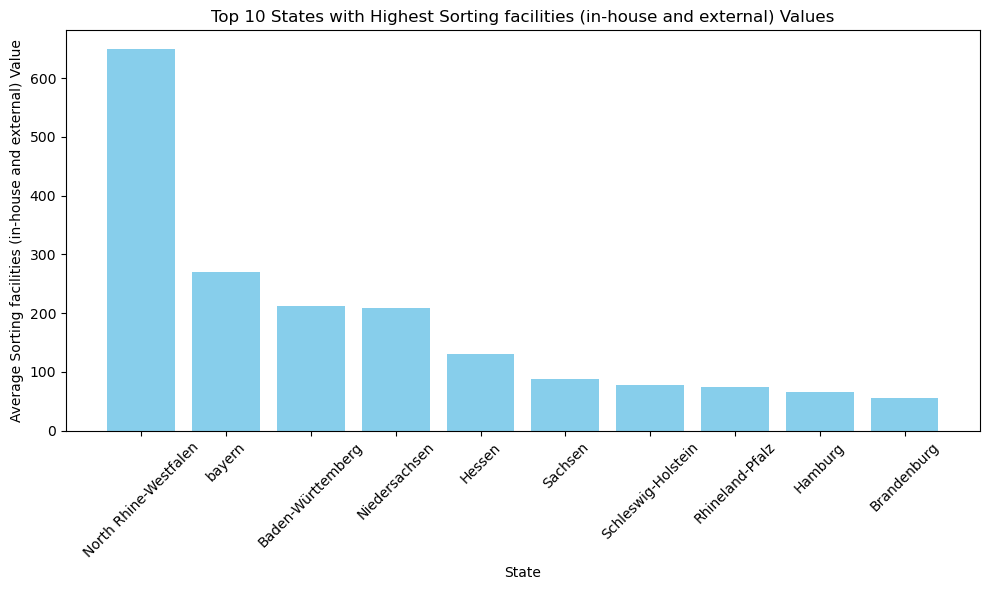

In [78]:
aggregated_data = data.groupby('States')['Sorting facilities (in-house and external)'].mean().reset_index()

sorted_data = aggregated_data.sort_values(by='Sorting facilities (in-house and external)', ascending=False)
top_states = sorted_data.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_states['States'], top_states['Sorting facilities (in-house and external)'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Sorting facilities (in-house and external) Value')
plt.title('Top 10 States with Highest Sorting facilities (in-house and external) Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top state with Recovery operators (including scrap merchants)	

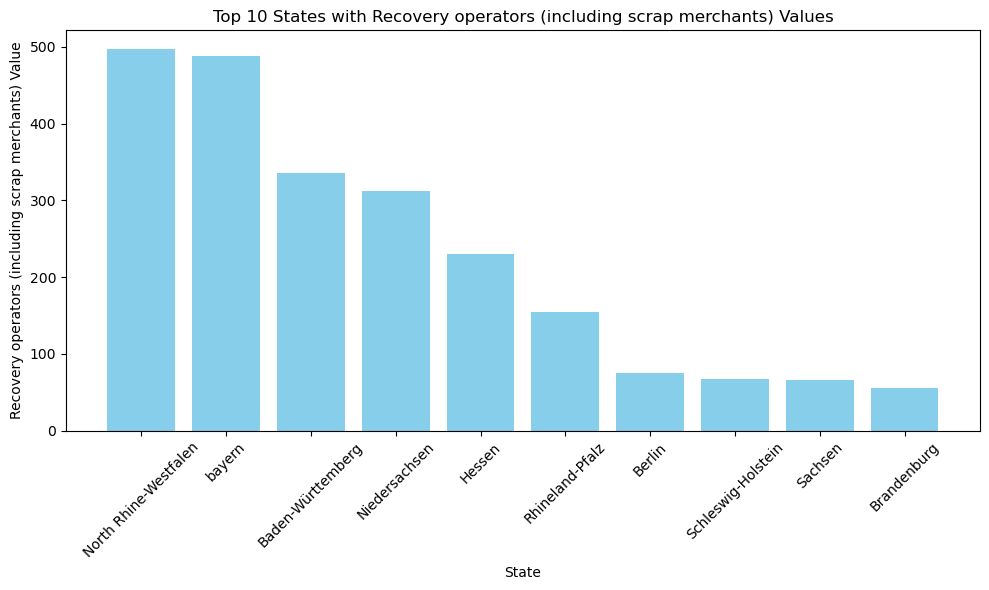

In [79]:
aggregated_data = data.groupby('States')['Recovery operators (including scrap merchants)'].mean().reset_index()

sorted_data = aggregated_data.sort_values(by='Recovery operators (including scrap merchants)', ascending=False)
top_states = sorted_data.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_states['States'], top_states['Recovery operators (including scrap merchants)'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Recovery operators (including scrap merchants) Value')
plt.title('Top 10 States with Recovery operators (including scrap merchants) Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Remove columns
I will remove the Year, States and Total column

In [62]:
df = data.iloc[:,2:-1]
df

,Sorting facilities (in-house and external),Recovery operators (including scrap merchants)
0,265.4,310.5
1,154.2,549.2
2,102.1,36.2
3,90.8,35.9
4,7.5,19.5
...,...,...
315,43.9,22.1
316,79.5,120.1
317,45.5,49.9
318,21.6,56.9


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Sorting facilities (in-house and external)      320 non-null    float64
 1   Recovery operators (including scrap merchants)  320 non-null    float64
dtypes: float64(2)
memory usage: 5.1 KB


# Find missing value of data

In [53]:
missing_values = df.isnull()

# Count missing values by column
missing_counts = df.isnull().sum()

# Count missing values in the entire DataFrame
total_missing = df.isnull().sum().sum()

# Display the results
print("Missing Values by Column:")
print(missing_counts)

Missing Values by Column:
Sorting facilities (in-house and external)        0
Recovery operators (including scrap merchants)    0
dtype: int64


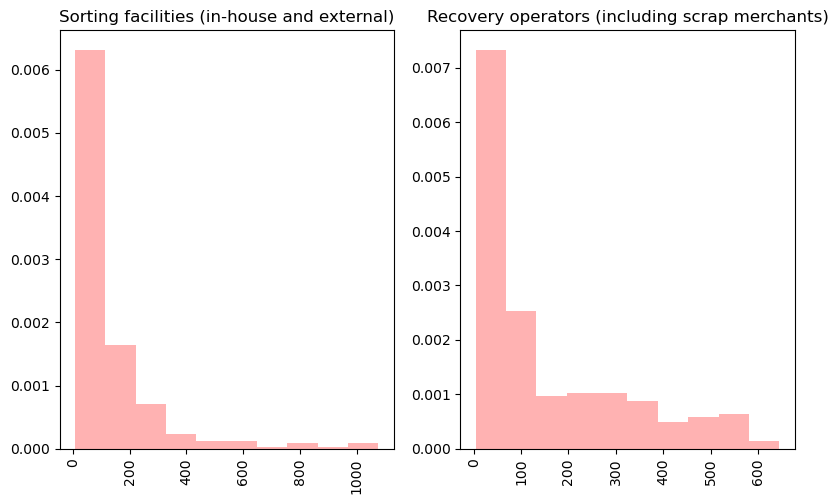

In [15]:
plt.figure(figsize=(25,25))
for i, col in enumerate(df.columns[:]):
    plt.subplot(4,5,i+1)
    plt.hist(df[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

# Plotting outliers

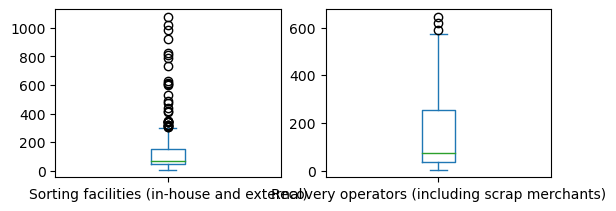

In [16]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### There are many outliers in the Sorting Facilities collumn, so I'll try to reduce them by using Interquartile Range (IQR) method

In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [44]:
IQR = Q3 - Q1
factor = 1.5
df_remove_outliers = df[(df >= Q1 - factor * IQR) & (df <= Q3 + factor * IQR)]


### Outliers has been reduced

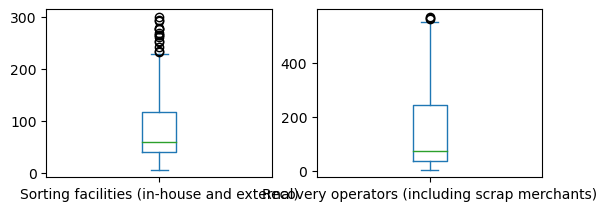

In [51]:
df_remove_outliers.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.show()

# Checking on correlation

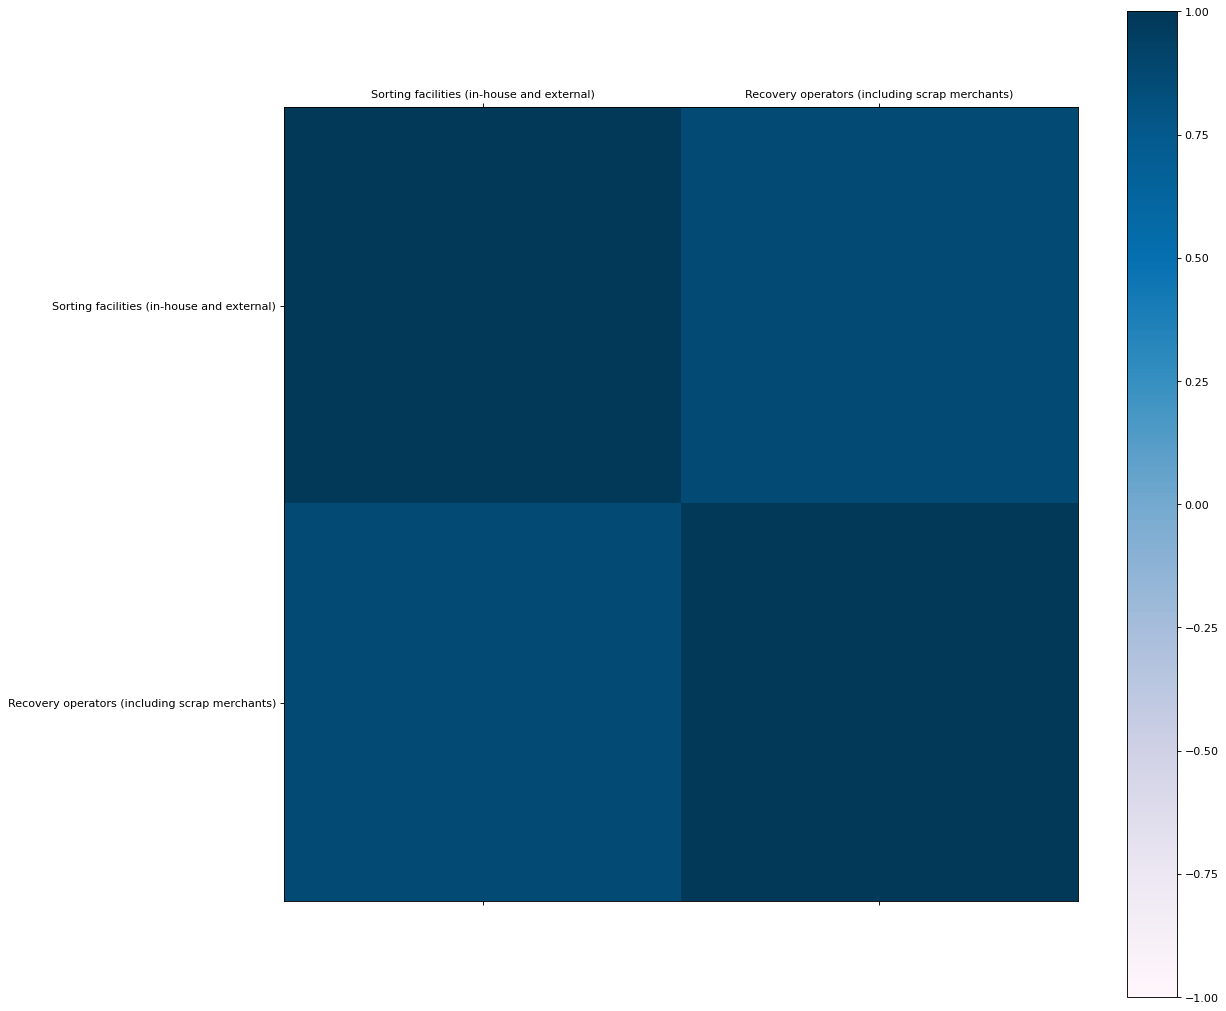

In [50]:
correlation = df_remove_outliers.corr()
fig = plt.figure(figsize=(16, 16), dpi=80)
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1, cmap=plt.cm.PuBu)
fig.colorbar(cax)
ticks = np.arange(0,2,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

### There are positive correlation between data